# XGBoost:A Comprehensive Journey Through the Algorithm

# Table of Contents
1. [Overview](#overview)
2. [Distinctive Features](#features)
   1. [Reguralization](#regularization)
   2. [Approximate Greedy Algorithm](#approximate-greedy)
   3. [Column Block](#column-block)
   4. [Weighted Quantile Sketch](#wqs)
   5. [Sparsity-Awarness](#sparsity)
   6. [Tree Pruning](#pruning)
   7. [Parallel and Distributed Computing](#parallel)
   8. [Reguralization on Leaf Nodes](#reg-leaf)
3. [XGBoost's Functional Characteristics](#func-chars)
4. [Toy Examples](#toy)
   1. [Regularization Techniques](#reg-ex)
   2. [Parallel Computing](#parallel-ex)
   3. [Tree Pruning](#pruning-ex)
5. [Hyperparameters Analysis](#hyper)
   1. [Impact On Model Perforamance](#impact)
   2. [Example with Different Hyperparameters](#example)
   3. [Getting The Best with GridSearch](#grid)
6. [Optimal Use Cases](#uses)
7. [Limitations](#limit)
8. [Parallelization Capabilities](#capabilities)
9. [Final Thoughts](#summary)


# Overview <a id="overview"></a>


[XGBoost](http://xgboost.readthedocs.io/en/stable/) is an optimized distributed gradient boosting algorithm designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. 

## XGBoost Mathematical Framework

- **Objective Function:**
   \\[ \text{Objective} = \sum_{i=1}^{n} L(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k) \\]

  \\( L(y_i, \hat{y}_i) = \frac{1}{2}(y_i - \hat{y}_i)^2  \text{ for example, in regression, or } L(y_i, \hat{y}_i) = - [y_i    \log(\sigma(\hat{y}_i)) + (1 - y_i) \log(1 - \sigma(\hat{y}_i))] \text{ in binary classification} \\).

- **Initial Model:**
  \\[ F_0(x) = c \\]

  Where \( c \) can be any number but is usally set to **0.5**.


- **Sequential Model Building:**
  For \\(m = 1\\) to \\(M\\):

   - (A) Compute the pseudo-residuals:
     \\( \hat{y} - y \\)

   - (B) Compute the similarity score:
     \\[ \text{Similarity score} = \frac{\sum_{i=1}^{n} r_i^2}{n + \lambda} \\]

   - (C) Compute the Gain:

      **Left residual + Right residual - Root residual**.

   - (D) Then if we found a gain that is less than the min_split_gain parameter(gamma)
     then we stop growing the branch and by doing so we performed what is called **pruning**.

# 1) Distinctive Features: <a id="features"></a>

**How does the algorithm diverge from the standard gradient boosting framework?**

XGBoost excellence comes to play in the way it does various optimization methods to perform gradient boosting in a very quick and efficient way, as well as incorporating methods for reducing overfitting greatly. We will walk through these features:

1. **Regularization:** <a id="regularization"></a>
First of all, XGBoost incorporates regularization terms in the objective function to control overfitting. It includes both L1 (Lasso) and L2 (Ridge) regularization terms, L1 regularization adds a penalty term to the objective function based on the absolute values of the weights (coefficients) of the features while L2 regularization adds a penalty term to the objective function based on the squared values of the weights.
The overall objective function becomes a combination of the loss function and the regularization term.

\\[ \text{Objective} = \sum_{i=1}^{n} L(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k) \\]

2. **Approximate Greedy Algorithm:** <a id="approximate-greedy"></a>
XGBoost makes it possible to use the Exact Greedy Algorithm. This algorithm visits every potential value in the sorted values that belong to a feature in order to determine the splitting threshold, and it does this for every feature. This idea, for example, underpins the operation of the traditional gradient boosting decision tree used in scikit-learn. This method gets quite expensive for huge data sets, although it performs well on data with a small-to-moderate number of features and/or instances. This problem is solved by XGBoost by employing the Approximate Algorithm (histogram-based split), which splits the data into percentiles and only considers feature values that are in the vicinity of the Xth percentile as potential candidates for determining the splitting threshold.
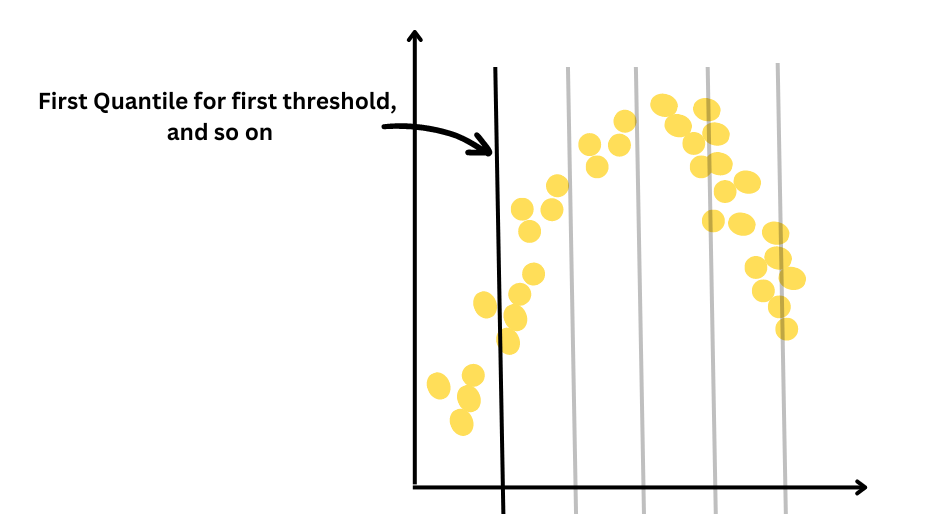
    Nevertheless, sorting through the entire data set to get the percentiles can still take a long time. This time, a system design known as Column Block for Parallel Learning comes handy, which we will explain in the upcoming point.

3. **Column Block:** <a id="column-block"></a>
In column block, the model first sorts the data by column and that means that the features will be stored in a compressed column format (CSC), after that statistical calculations will be done in parallel for each column to help make the decision of best split. 
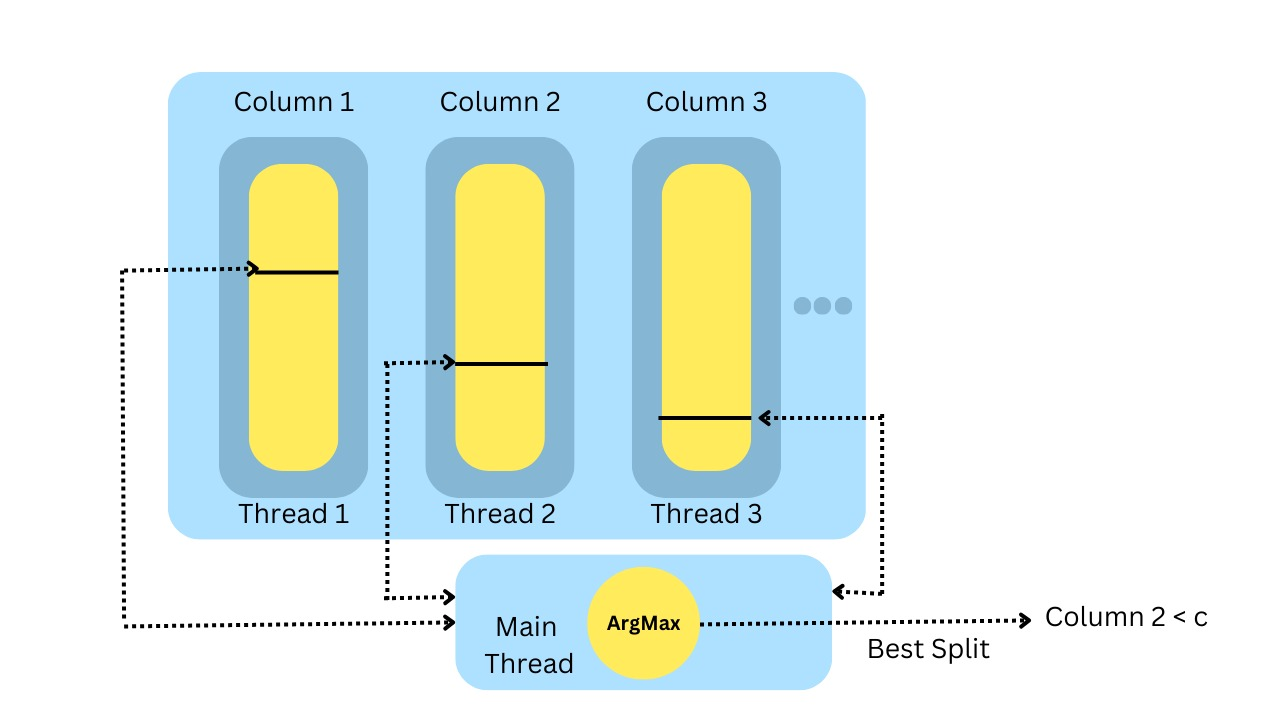

4. **Weighted Quantile Sketch** <a id="wqs"></a>
After performing parallel sorting processes, the weighted quantile sketch method is used to obtain the quantile values by combining the results into a histogram. Every quantile in the histogram should typically have an equal number of data points in a quantile sketch. Every (approximate) quantile in the histogram should, however, have the same weight in a weighted quantile sketch. 

    The amount of points in the node (or leaf) for regression issues is known as the weight (or cover) in XGBoost. Thus, keeping the weights of quantiles equal is equivalent to keeping the number of observations for regression constant. Its calculation differs for classification tasks, though. In other words, cases with high residuals will go into more specialized quantiles, which will result in those quantiles having fewer data points, and examples with low residuals will go into quantiles with higher weights in order to preserve the equality of the weight in each quantile. This potentially increases the number of quantiles, which improves accuracy.
    
5. **Sparsity Awareness:** <a id="sparsity"></a>
XGBoost is a sparsity-aware algorithm, meaning it can handle the presence of missing data, dense zero entries, and one-hot encoded values. This is made possible by defining a default direction for them.  Defining the splitting direction in XGBoost is a straightforward process, achieved through the following steps:

    1.1 **Finding Split Thresholds:**
       - Locate potential split threshold values using non-missing data points.

    1.2 **Calculating Residuals:**
       - Calculate the residuals for all data points, including those with missing values.

    1.3 **Optimizing Split Direction:**
       - For each candidate threshold, XGBoost explores both directions to determine the optimal placement of residuals, considering missing values to find their optimum direction.The optimum direction is the one that maximizes the gain.
       In prediction when the model meets sparse data point, it uses the default direction found using the    steps mentioned.
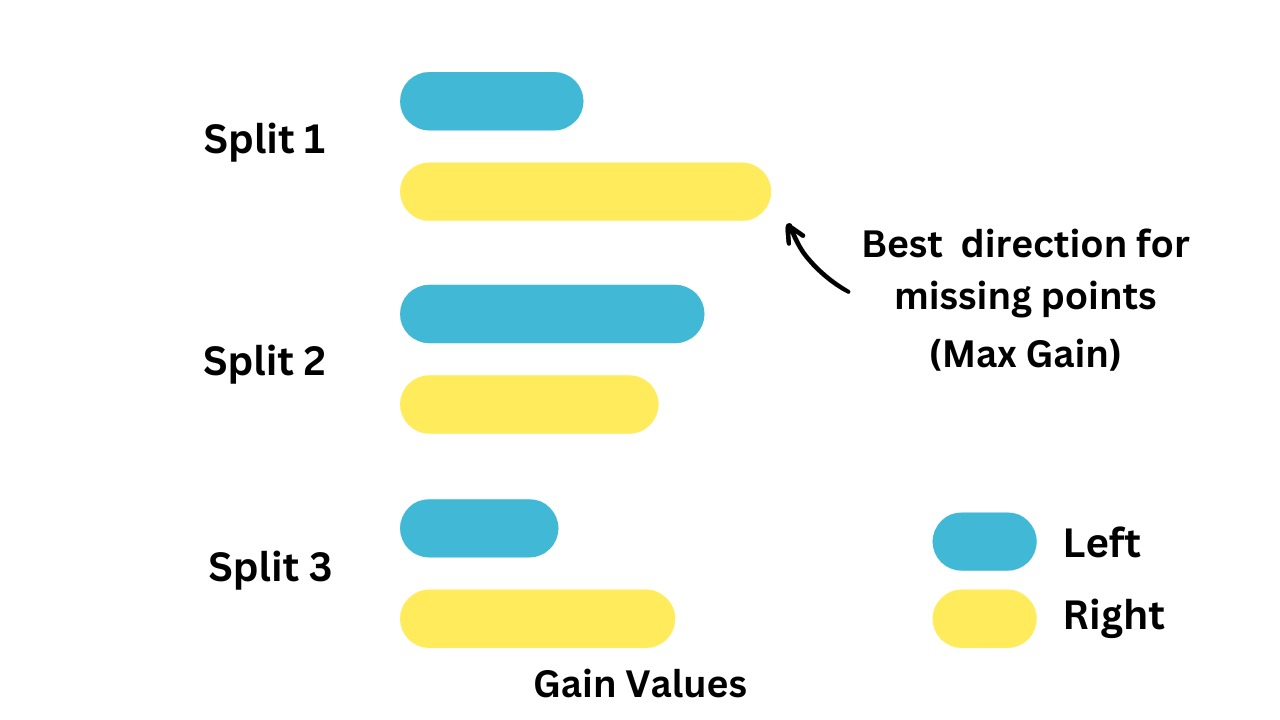

6. **Tree Pruning:** <a id="pruning"></a>
XGBoost uses a technique called "pruning" during the tree-building process. Trees are grown depth-wise, and at each step, XGBoost checks whether the addition of a new node improves the objective function. If not, the branch is pruned, reducing the complexity of the trees.

7. **Parallel and Distributed Computing:** <a id="parallel"></a>
XGBoost is designed for efficiency and speed. It supports parallel and distributed computing, making it scalable and capable of handling large datasets. This is achieved by distributing computations across multiple CPU cores and machines.

8. **Regularization on Leaf Nodes:** <a id="reg-leaf"></a>
Unlike traditional gradient boosting, XGBoost applies regularization directly to the leaf nodes, controlling the size of the leaves and providing additional control over model complexity.

# 2) XGBoost's Functional Characteristics <a id="func-chars"></a>

Now, we will dive deep into XGBoost's main characteristics, such as the Similarity Scores,Gain, Pruning, and the Output Values

- **The Similarity Score For Regression Problems**

    \\[ \text{Similarity score} = \frac{\sum_{i=1}^{n} r_i^2}{n + \lambda} \\]
    We start by putting all the residual values in a single leaf (the root) then calculate their Similarity Score.

   *Note: We do not square the values before adding them up, thus, if there are two residuals that have the same negative and positive values, they will cancel each other out*

   We continue splitting the tree and calculating the Similarity Score for each leaf in the tree.

   Now we need to know how much better do the leaves cluster similar residuals than the root.

   We do this by calculating the **Gain**
   
- **The Gain Value**

   Gain = Left Similarity + Right Similarity - Root Similarity

   We split the residuals into two groups and Calculate the Gain for the threshold we identified, then we calculate the Gain for all Other thresholds and Select the Larger Gain.

   After deciding which value we will split on, we will continue to split the leaves containing residuals by calculating the similarity score and their gains and selecting the highest gain to split on.

  *Note, the default is to allow up to 6 levels of the tree*
  
 
- **Pruning**

  Moving next, we need to know how to Prune the tree.
 
  Simply, Pruning is used to to reduce the complexity of the tree and prevent overfitting. It involves removing branches or nodes from the tree to improve generalization.

  We prune the tree based on its gain values. We pick a number (Gamma) and then calculate the difference between the Gain associated with the lowest branch in the tree and the Gamma value

  If the difference is Negative then we remove the branch, if it is positive then we keep the branch

  *Note: the value for lambda is inversely proportional to the value of Gain, therefore, increasing the lambda value encourages pruning as the Gain value will tend to be smaller than the Gamma value*

### We will explain the loss function for regression

The goal of this loss function is to build trees by **minimizing** the equation

\\[\sum_{i=1}^{n} L(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k) \\]

where \\[\sum_{k=1}^{K} \Omega(f_k) \\]= \\[\gamma T + 1/2 * \lambda ||\omega||^2 \\]

here, the term \\[\gamma T \\] can be ommited because gamma is a user-definable penalty that is meant to encourage pruning, and pruning is made only after the tree is built, so it does not affect the derivation of the Similarity Scores. 

the term \\[\sum_{i=1}^{n} L(y_i, \hat{y}_i) \\] is the loss function and \\[1/2 * \lambda ||\omega||^2 \\] is the regularization term where *w* is the output value and lambda is a scaling parameter.
we set different output values, calculate the loss, and draw the curve of the output values vs the total loss function (We get a convex function). the more emphasis we give the regularization penalty by increasing lambda, the optimal *w* value gets closer to Zero.


Moving to the output value calculation.
XGBoost uses the second order Taylor Approximation to solve for both Regression And Classification Problems which includes the previous loss function, its first derivative (the gradient) multiplied by thr Output value and its second derivative (The Hessian matrix) multiplied by the square of the Output value. After substituting into the loss function + regularization formula, ommitting the terms that does not contain the Output value, taking the derivative with respect to the Output value and setting it to zero we get the final formula for the optimum 
\\[ \text{Output Value} = -\frac{\sum_{i=1}^{n} \text{gradients}_i}{\sum_{i=1}^{n} \text{hessians}_i + \lambda} \\]

  which, when we translate the gradients and hessians with respect to the predicted value is \\[ \text{Output Value} = \frac{\sum_{i=1}^{n} r_i}{n + \lambda} \\]

### To sum up what happened, we are trying to estimate the output value for a leaf.
* We started by making an initial prediction, 0.5
* Then calculated the residuals and put them all in a leaf
* We used a loss function + regularization to answer the question "What should be the output value of this leaf?"
* Solved for the lowest point of the function where the derivative = ZERO
* Got the final Formula used to calculate the XGBoost's Output Value 

# 3) Toy Examples <a id="toy"></a>

#### 1. Regularization Techniques: <a id="reg-ex"></a>

XGBoost introduces L1 and L2 regularization terms into its objective function, enriching the model's capacity to combat overfitting and enhance generalization. This regularization finesse empowers XGBoost to navigate the delicate balance between complexity and simplicity, a feat often challenging for vanilla gradient boosting.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBClassifier(reg_alpha=0.1, reg_lambda=0.1)
xgb_model.fit(X_train, y_train)

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Evaluate models
xgb_preds = xgb_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_preds)
gb_accuracy = accuracy_score(y_test, gb_preds)

print("XGBoost Accuracy:", round(xgb_accuracy * 100 , 5))
print("Gradient Boosting Accuracy:", round(gb_accuracy * 100 , 5))

#### 2. Parallel Computing: <a id="parallel-ex"></a>

XGBoost's innate parallelizability empowers it to harness the computational prowess of multiple CPU cores efficiently. This parallel computing prowess not only expedites training times but also enhances scalability, making XGBoost a preferred choice for handling large-scale datasets.



In [ ]:
import time
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Generate synthetic data for classification
X, y = make_classification(n_samples=10000, n_features=100, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
start_time = time.time()
xgb_model = XGBClassifier(n_estimators=100)
xgb_model.fit(X_train, y_train)
xgb_training_time = time.time() - start_time

# Train Gradient Boosting model
start_time = time.time()
gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train, y_train)
gb_training_time = time.time() - start_time

print("XGBoost Training Time (in seconds):", xgb_training_time)
print("Gradient Boosting Training Time (in seconds):", gb_training_time)


#### 3. Tree Pruning: <a id="pruning-ex"></a>

XGBoost employs sophisticated tree pruning techniques to trim splits that do not contribute positively to model performance. This strategic pruning prevents overfitting, particularly in scenarios with deep trees, and enhances the interpretability and generalization of the model.

 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(max_depth=3)
gb_model.fit(X, y)

# Visualize Gradient Boosting tree
plt.figure(figsize=(20, 10))
plot_tree(gb_model.estimators_[0, 0], feature_names=[f"Feature {i}" for i in range(1, 6)], class_names=["Class 0", "Class 1"], filled=True)
plt.show()


# 4) Hyperparameters Analysis <a id="hyper"></a>

Hyperparameters are configuration settings that direct the learning process of the algorithm. Unlike parameters, which are learned from the data during training, hyperparameters are set prior to training and directly influence the model's behavior and performance.


### List of Hyperparameters:

- **learning_rate (eta):** The step size shrinkage used to prevent overfitting. Default value is 0.3.

- **lambda (reg_lambda):** L2 regularization term on weights. Default value is 1.0.

- **alpha (reg_alpha):** L1 regularization term on weights. Default value is 0.

- **gamma:** Minimum loss reduction required to make a further partition on a leaf node of the tree. Default value is 0.

- **max_depth:** The maximum depth of each tree in the boosting process. Default value is 6.

- **n_estimators:** The number of boosting rounds or trees to build. Default value is 100.

- **subsample:** The fraction of observations to be randomly sampled for each tree. Default value is 1.0.

- **colsample_bytree:** The fraction of features to be randomly sampled for each tree. Default value is 1.0.

- **min_child_weight:** Minimum sum of instance weight (hessian) needed in a child. Default value is 1.


### 1.Impact on Model Performance¶<a id="impact"></a>

Each hyperparameter plays a crucial role in shaping the behavior and performance of the XGBoost model. Let's discuss the impact of some key hyperparameters:

- **learning_rate:**
  - A lower learning rate may lead to better generalization.
  - Higher learning rates can speed up the training process but may result in overfitting.
- **max_depth:**
  - Deeper trees can capture more complex patterns but may lead to overfitting.
  - Shallower trees are less prone to overfitting.
- **alpha (reg_alpha):**
  - L1 regularization term on weights.
  - Adding alpha penalizes large weights, leading to reducing overfitting.
- **lambda (reg_lambda):**
  - L2 regularization term on weights.
  - Increasing lambda penalizes large weights, leading to a more robust model and reducing overfitting.
- **gamma:**
  - Minimum loss reduction required to make a further partition on a leaf node of the tree.
  - A higher value for gamma encourages pruning of the tree, which can prevent overfitting.
- **n_estimators:**
  - Increasing the number of trees can improve model performance but also increases computational cost.
  - Too few trees may result in underfitting, while too many trees may lead to overfitting.

### 2.Practical Example <a id="example"></a>

Let's illustrate the impact of hyperparameters using a practical example with a toy regression dataset,the California housing already found in Sklearn,no need to import any external dataset.

In [ ]:
#Importing the tools
import pandas as pd
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [ ]:
#Fetching the data and splitting it
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = california_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Examining with different hyperparameters
xgb_model_default = xgb.XGBRegressor()  # default hyperparameters
xgb_model_lr = xgb.XGBRegressor(learning_rate=0.01)  # low learning rate
xgb_model_md = xgb.XGBRegressor(max_depth=10)  # deeper trees
xgb_model_nt = xgb.XGBRegressor(n_estimators=500)  # more trees
xgb_model_gamma = xgb.XGBRegressor(gamma=0.1)  # gamma example
xgb_model_lambda = xgb.XGBRegressor(reg_lambda=0.5)  # lambda example

In [ ]:
#Printing the different cases
models = {'Default': xgb_model_default, 'Low Learning Rate': xgb_model_lr, 
          'Deeper Trees': xgb_model_md, 'More Trees': xgb_model_nt,
          'Gamma': xgb_model_gamma, 'Lambda': xgb_model_lambda}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error ({name}): {mse}")

**It is clear that using different values for the hyperparameters shape the model performance and therefore its generalization ability.**

**Yet,why not to get the best parameters?**

#### 3.Getting the best parameters using GridSearch: <a id="grid"></a>

In [ ]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05, 0.0001],
    'gamma': [0,0.1, 0.01, 0.05, 1],
    'reg_lambda': [0, 0.5, 1, 5, 10]
}
optimal_params = GridSearchCV(
    estimator = xgb.XGBRegressor(objective='reg:squarederror',
                                  seed=42,
                                  eval_metric='rmse',
                                  early_stopping_rounds=10,
                                  subsample=0.8,
                                  colsample_bytree=0.5),
    param_grid = param_grid,
    scoring = 'neg_root_mean_squared_error',
    verbose = 0,
    n_jobs = 10,
    cv = 3
)

In [ ]:
optimal_params.fit(X_train, y_train,
                   eval_set=[(X_test, y_test)],
                   verbose=False)

In [ ]:
best_estimator = optimal_params.best_estimator_

best_estimator.fit(X_train, y_train,
                   eval_set=[(X_test, y_test)],
                   verbose=False)

In [ ]:
y_pred = best_estimator.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
optimal_params.best_params_

**We notice the best parameters in the last grid search round and start a second round with more guesses near to the last best parameters.**

### Second Round Grid Search

In [ ]:
param_grid = {
    'max_depth': [5, 7, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'gamma': [0.05, 0.1, 0.5],
    'reg_lambda': [0.5, 1, 5]
}
optimal_params = GridSearchCV(
    estimator = xgb.XGBRegressor(objective='reg:squarederror',
                                  seed=42,
                                  eval_metric='rmse',
                                  early_stopping_rounds=10,
                                  subsample=0.8,
                                  colsample_bytree=0.5),
    param_grid = param_grid,
    scoring = 'neg_root_mean_squared_error',
    verbose = 0,
    n_jobs = 10,
    cv = 3
)

In [ ]:
optimal_params.fit(X_train, y_train,
                   eval_set=[(X_test, y_test)],
                   verbose=False)

In [ ]:
best_estimator = optimal_params.best_estimator_

best_estimator.fit(X_train, y_train,
                   eval_set=[(X_test, y_test)],
                   verbose=False)

In [ ]:
y_pred = best_estimator.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

In [ ]:
optimal_params.best_params_

**We can now say that we have got THE BEST OUT OF THE BEST!**

As a recap on this section,let's have look again on the most important hyperparameters of XGBoost and their description.

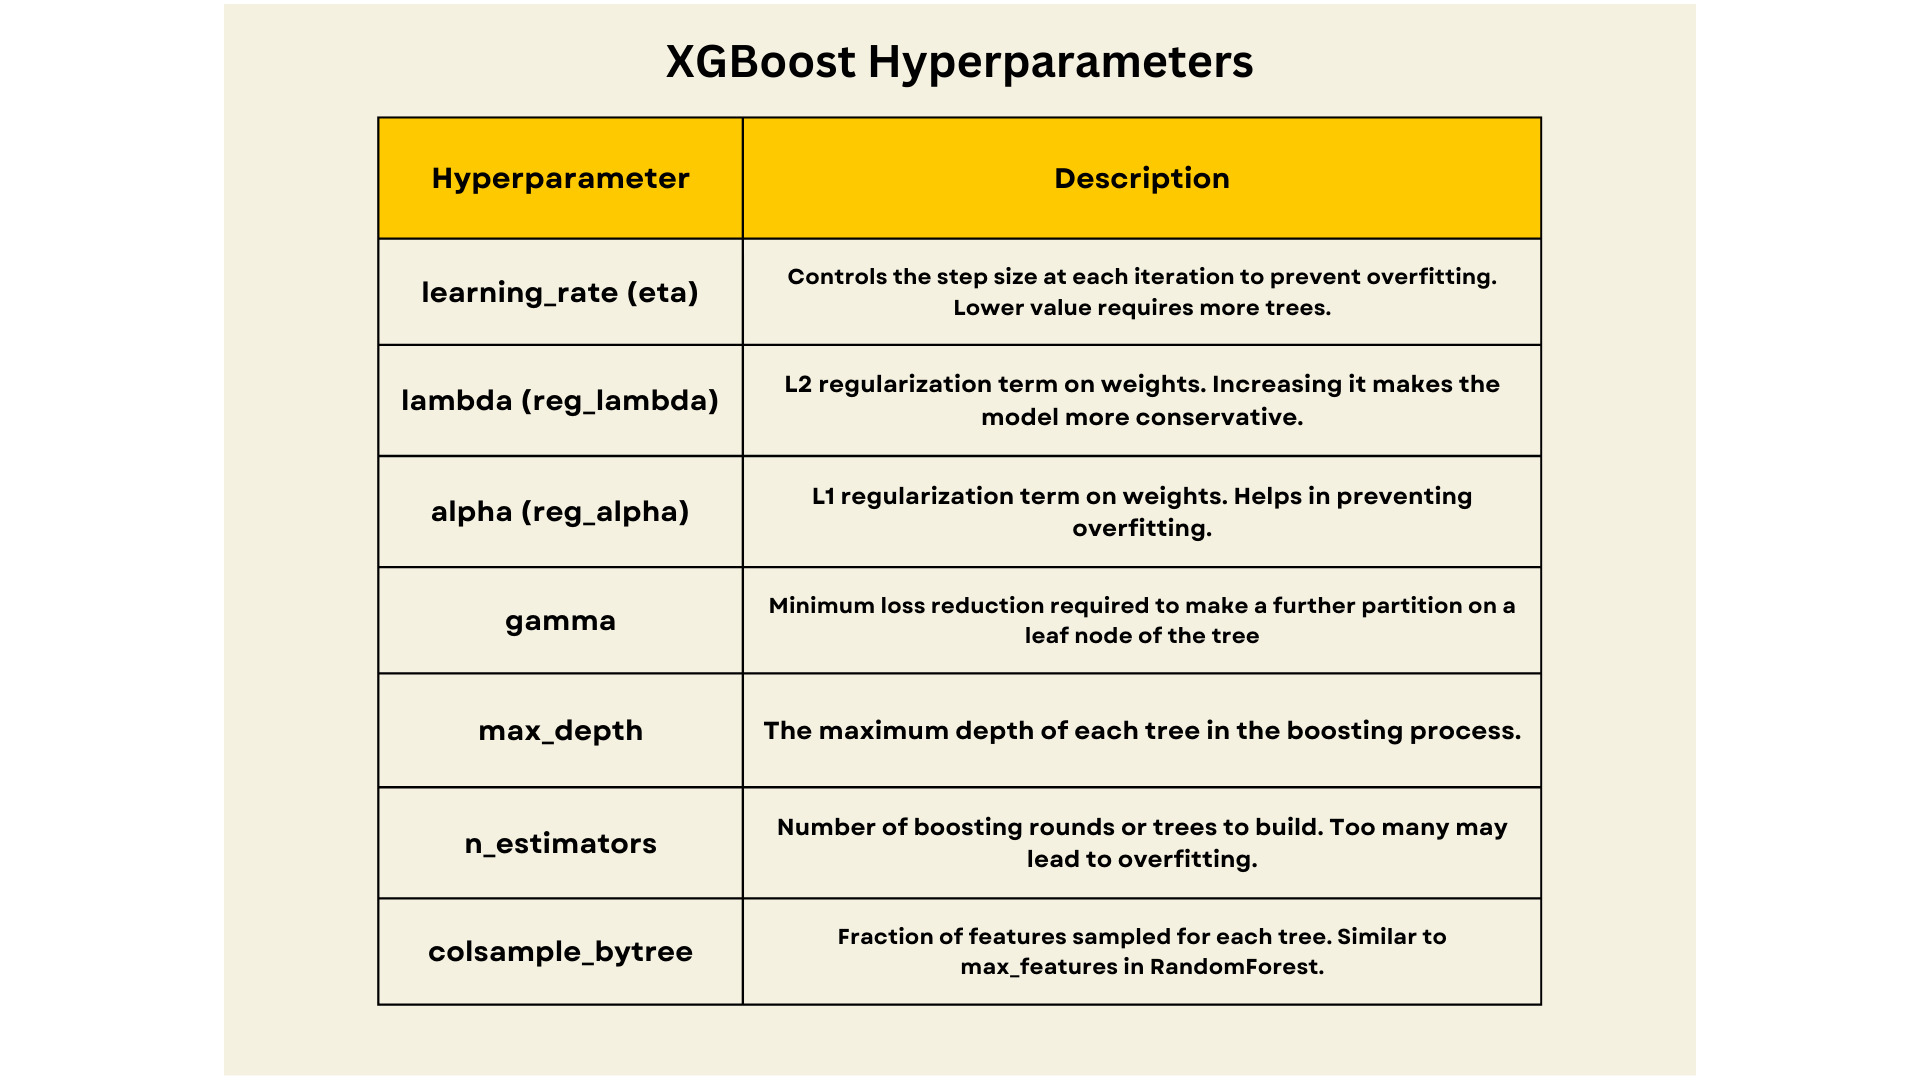

# 5) Optimal Use Cases <a id="uses"></a>

#### XGBoost works well for a variety of use cases, such as:

- **Regression**: Predicting continuous target variables, e.g., house prices or customer lifetime value.

- **Classification**: Binary or multi-class classification problems, e.g., customer churn prediction or email spam detection.

- **Ranking**: Learning to rank problems, e.g., search engine result ranking or product recommendation.


It is particularly effective in various scenarios and data types due to its efficiency, accuracy, and ability to handle complex relationships in the data.

#### Here are some optimal use cases:

- **Structured Tabular Data** 

    XGBoost is highly effective on structured tabular data common in applications like finance, marketing, and healthcare.

- **Classification and Regression Tasks**

   It is versatile and excels in both classification and regression tasks, making it suitable for a wide range of predictive modeling problems.

- **Imbalanced Datasets**

  XGBoost provides options to handle class imbalances in classification problems. It can assign different weights to positive and negative samples, making it effective in imbalanced datasets.

- **Large Datasets**

  XGBoost is optimized for speed and memory efficiency, making it suitable for large datasets. It supports parallel processing and can handle data that doesn't fit into memory.

# 6) Limitations <a id="limit"></a>

like any algorithm, **XGBoost** has its limitations and potential drawbacks. Some of the main limitations of XGBoost include:

- **Computational Complexity:** XGBoost can be computationally intensive, especially when dealing with large datasets or when training complex models with many trees and deep trees. Training time and memory requirements can become significant, particularly on single-core CPUs or when using large ensembles.

- **Hyperparameter Tuning:** Achieving optimal performance with XGBoost often requires careful tuning of hyperparameters. Finding the best combination of hyperparameters can be time-consuming and requires extensive experimentation or optimization techniques.

- **Interpretability:** While XGBoost can achieve high predictive accuracy, the resulting models are often considered "black boxes" due to their complexity. Understanding the relationships between predictor variables and the outcome can be challenging, particularly when dealing with many features and complex interactions.

- **Memory usage:** XGBoost can be memory-intensive, especially for large datasets. This can make it challenging to run on computers with limited memory, leading to slower performance.

# 7) Parallelization Capabilities <a id="capabilities"></a>

1. **Parallelization in Training:**

    - *Column Block Parallelism:* As mentioned before, XGBoost processes data in column blocks rather than row by row. Each column block represents a subset of the features. This allows parallel processing of different feature subsets across multiple threads or processors.

    - *Row Parallelism:* Within each column block, XGBoost can also use row parallelism. It parallelizes the creation of decision trees by distributing computations for different rows across multiple threads.

    - *Distributed Computing:* XGBoost can further leverage distributed computing frameworks like Apache Spark or Dask for training on large datasets distributed across multiple machines. This enables horizontal scaling, making XGBoost suitable for big data scenarios.

2. **Parallelization in Prediction:**

    - *Tree Evaluation Parallelism:* During prediction, XGBoost can parallelize the evaluation of trees. The model's prediction for a given instance is the sum of predictions from all trees. Since trees are independent of each other, their evaluations can be parallelized.

    - *Data Parallelism:* XGBoost can divide the dataset into smaller chunks and distribute them across multiple threads or processors for prediction. Each chunk is processed independently, and their results are combined.

3. **Efficiency and Performance Impact:**

    - *Reduced Training Time:* Parallelization in training significantly reduces the time required to build the ensemble of trees. By processing different subsets of features and rows simultaneously, XGBoost can exploit the parallel processing capabilities of modern CPUs and GPUs.

    - *Scalability:* The ability to parallelize training and prediction allows XGBoost to scale efficiently. Whether working on a multi-core machine or distributing computations across a cluster of machines, XGBoost can handle larger datasets and more complex models.


## Summary <a id="summary"></a>


In this notebook, we explored the powerful capabilities of XGBoost, the popular gradient boosting algorithm known for its efficiency and performance. Throughout our comprehsive journey, we came across various aspects of XGBoost, from its distinctive features to its advanced techniques in regularization, parallelization, and hyperparameter optimization.

#### Key Takeaways:

- XGBoost offers an efficient and versatile solution for a wide range of machine learning tasks.
- Understanding its regularization techniques, parallelization capabilities, and hyperparameters is crucial for maximizing its performance.
- While XGBoost delivers impressive results in many scenarios, it's essential to be mindful of its limitations and select optimal use cases accordingly.